Ánalise 2 - 10 Instituições com Mais Inventimentos

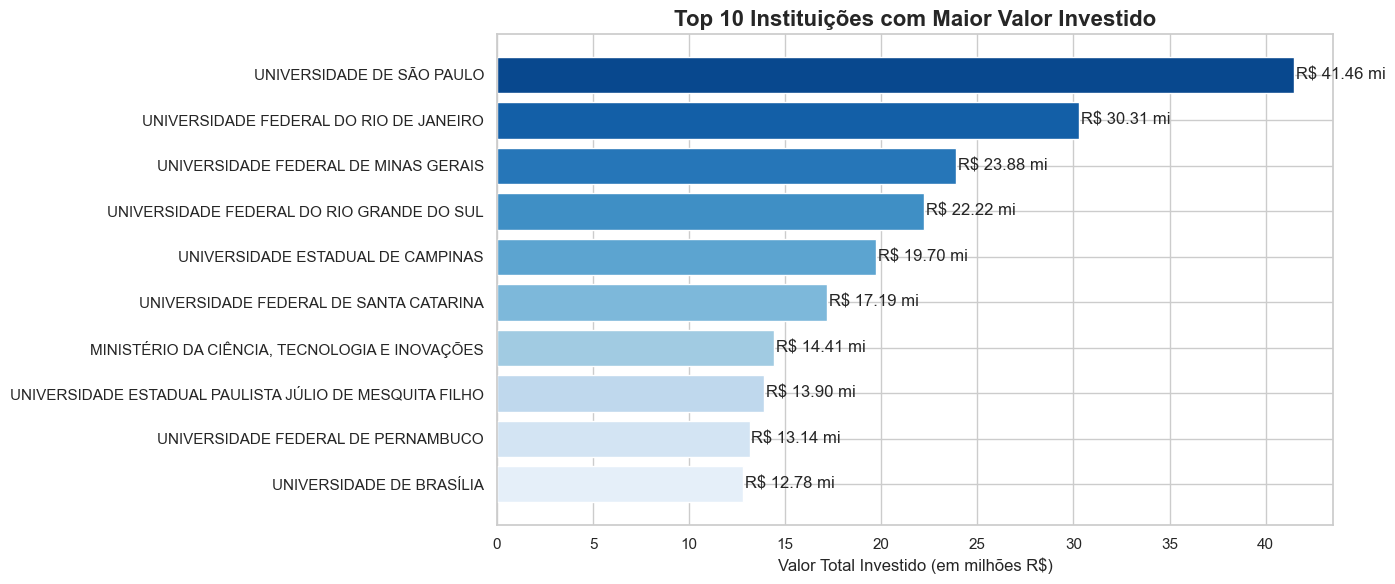

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")

# Carregar dados
inep = pd.read_csv("C:/Users/cynth/OneDrive/Área de Trabalho/Desafio_Eng._Dados_FADESP/data/processed/inep_tratado.csv")

# Limpar VALOR_PAGO
inep['VALOR_PAGO'] = (
    inep['VALOR_PAGO']
    .astype(str)
    .str.replace("R\$", "", regex=True)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
)
inep['VALOR_PAGO'] = pd.to_numeric(inep['VALOR_PAGO'], errors='coerce')
inep = inep.dropna(subset=['VALOR_PAGO'])

# Padronizar nomes
inep["NOME_INSTITUICAO"] = inep["NOME_INSTITUICAO"].str.upper()

# Agrupar valores
valor_total_por_ies = inep.groupby("NOME_INSTITUICAO")["VALOR_PAGO"].sum().reset_index(name="VALOR_TOTAL")

# Top 10
top10_valor = valor_total_por_ies.sort_values(by="VALOR_TOTAL", ascending=False).head(10)

# Converter para milhões e formatar nomes longos
top10_valor["VALOR_MILHOES"] = top10_valor["VALOR_TOTAL"] / 1e6
top10_valor["VALOR_FMT"] = top10_valor["VALOR_MILHOES"].map("{:,.2f}".format)

# Gráfico
plt.figure(figsize=(14, 6))
bars = plt.barh(top10_valor["NOME_INSTITUICAO"], top10_valor["VALOR_MILHOES"], color=sns.color_palette("Blues_r", 10))
plt.xlabel("Valor Total Investido (em milhões R$)", fontsize=12)
plt.title("Top 10 Instituições com Maior Valor Investido", fontsize=16, weight="bold")
plt.gca().invert_yaxis()

# Adicionar rótulos nas barras
for bar, label in zip(bars, top10_valor["VALOR_FMT"]):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f"R$ {label} mi", va='center', fontsize=12)

plt.tight_layout()
plt.show()
